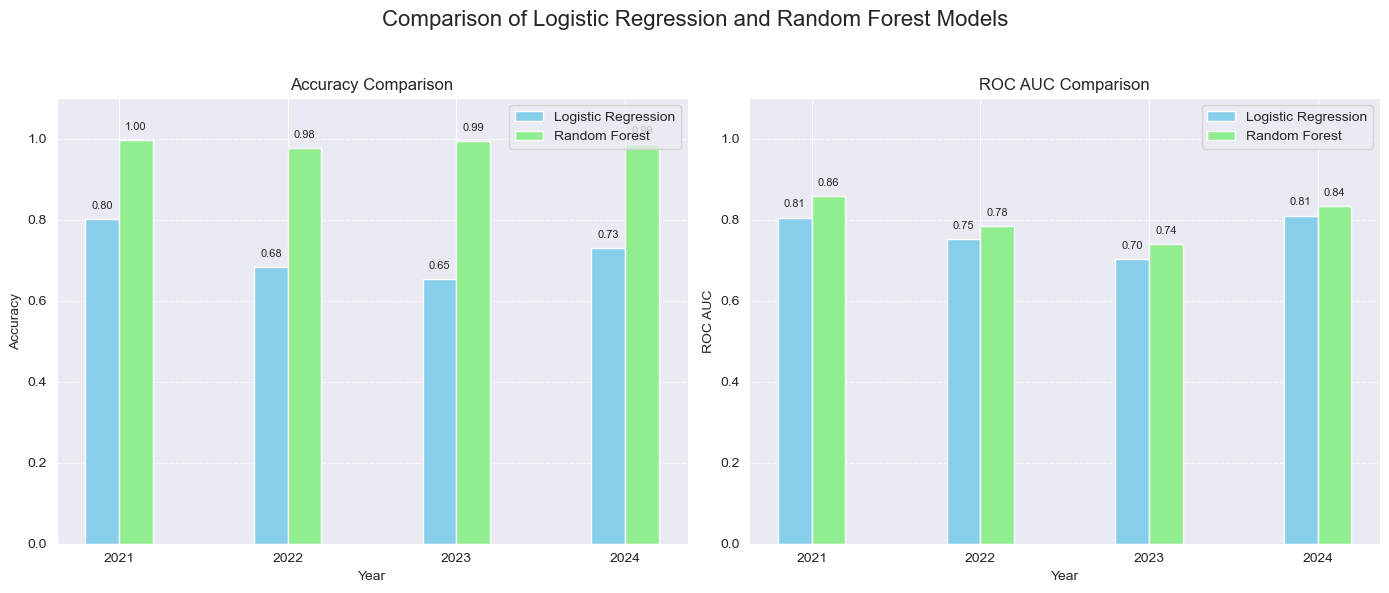

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data for Logistic Regression
log_reg_data = {
    'file_year': [2021, 2022, 2023, 2024],
    'accuracy': [0.8015360447, 0.6823591013, 0.6528325849, 0.7294004208],
    'roc_auc': [0.80572174, 0.753229331, 0.702788441, 0.810665164]
}

# Data for Random Forest
random_forest_data = {
    'file_year': [2021, 2022, 2023, 2024],
    'accuracy': [0.9971780997, 0.9778417746, 0.994126185, 0.9868732468],
    'roc_auc': [0.859780039, 0.784356793, 0.740858907, 0.835015572]
}

# Convert to DataFrames
log_reg_df = pd.DataFrame(log_reg_data)
rf_df = pd.DataFrame(random_forest_data)

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Comparison of Logistic Regression and Random Forest Models', fontsize=16)

# Define x positions for bars
years = log_reg_df['file_year'].astype(str)
x = np.arange(len(years))
width = 0.2  # Width of the bars

# Plot Accuracy comparison in the first subplot
ax1.set_title('Accuracy Comparison')
ax1.bar(x - width/2, log_reg_df['accuracy'], width, label='Logistic Regression', color='skyblue')
ax1.bar(x + width/2, rf_df['accuracy'], width, label='Random Forest', color='lightgreen')

ax1.set_xticks(x)
ax1.set_xticklabels(years)
ax1.set_xlabel('Year')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1.1)
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot ROC AUC comparison in the second subplot
ax2.set_title('ROC AUC Comparison')
ax2.bar(x - width/2, log_reg_df['roc_auc'], width, label='Logistic Regression', color='skyblue')
ax2.bar(x + width/2, rf_df['roc_auc'], width, label='Random Forest', color='lightgreen')

ax2.set_xticks(x)
ax2.set_xticklabels(years)
ax2.set_xlabel('Year')
ax2.set_ylabel('ROC AUC')
ax2.set_ylim(0, 1.1)
ax2.legend()
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
def add_value_labels(ax, spacing=0.02):
    """Add value labels on top of each bar"""
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        label = f"{y_value:.2f}"
        ax.annotate(label, (x_value, y_value + spacing),
                   ha='center', va='bottom', fontsize=8, rotation=0)

add_value_labels(ax1)
add_value_labels(ax2)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

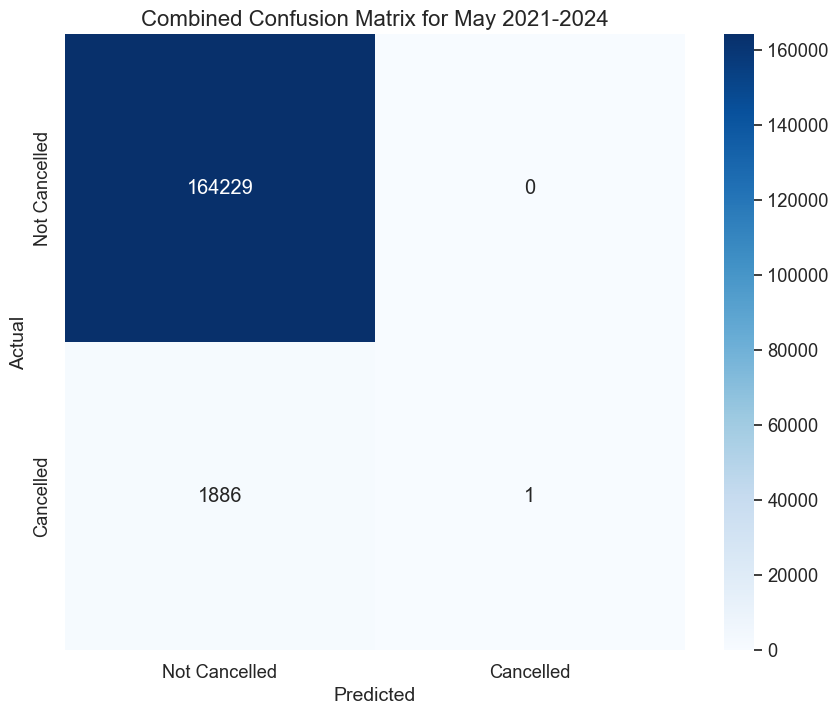

Confusion Matrix Analysis (2021-2024)
----------------------------------------
True Positives (Correctly predicted Not Cancelled): 164229
False Negatives (Not Cancelled predicted as Cancelled): 0
False Positives (Cancelled predicted as Not Cancelled): 1886
True Negatives (Correctly predicted Cancelled): 1
----------------------------------------
Total Records: 166116
Accuracy: 98.86%
Precision: 98.86%
Recall: 100.00%
F1 Score: 99.43
Cancellation Rate: 1.14%


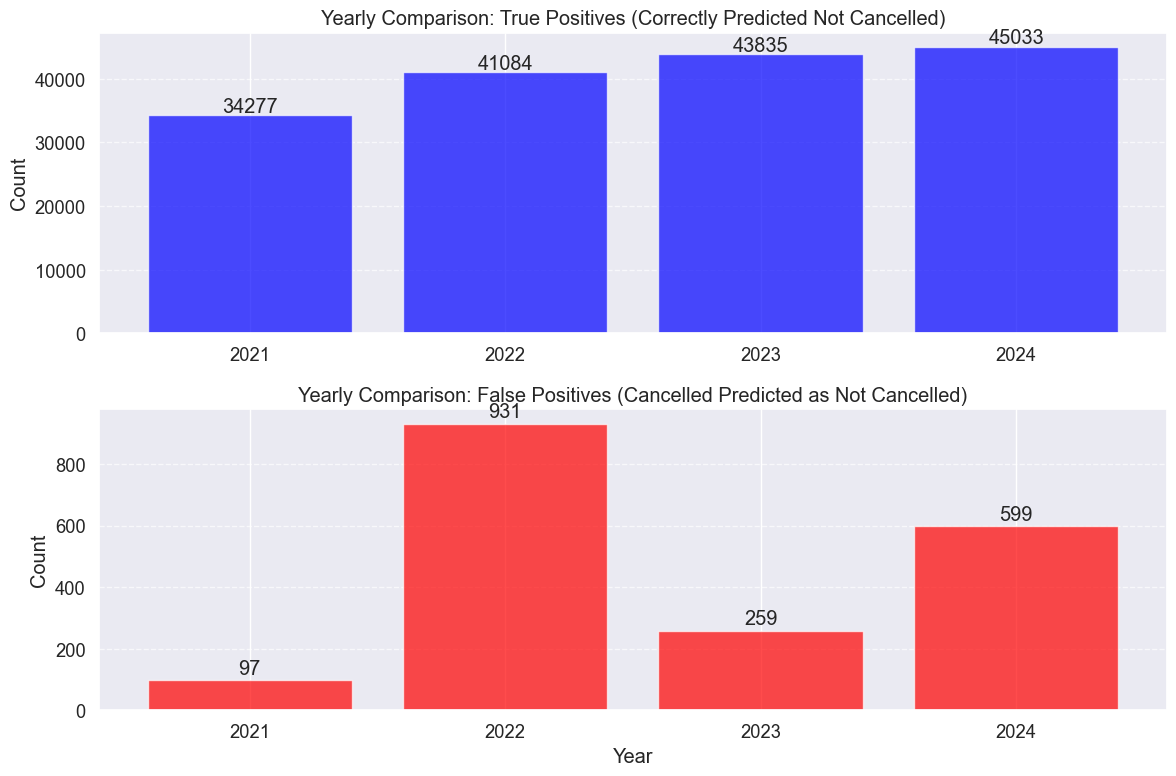

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

may2021 = [34277, 0, 97, 0]
may2022 = [41084, 0, 931, 1]
may2023 = [43835, 0, 259, 0]
may2024 = [45033, 0, 599, 0]

combined = np.array([
    [may2021[0] + may2022[0] + may2023[0] + may2024[0],
     may2021[1] + may2022[1] + may2023[1] + may2024[1]],
    [may2021[2] + may2022[2] + may2023[2] + may2024[2],
     may2021[3] + may2022[3] + may2023[3] + may2024[3]]
])

total = combined.sum()
true_positive = combined[0, 0]
false_negative = combined[0, 1]
false_positive = combined[1, 0]
true_negative = combined[1, 1]

accuracy = (true_positive + true_negative) / total * 100
precision = true_positive / (true_positive + false_positive) * 100 if (true_positive + false_positive) > 0 else 0
recall = true_positive / (true_positive + false_negative) * 100 if (true_positive + false_negative) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
cancellation_rate = (false_positive + true_negative) / total * 100

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
ax = sns.heatmap(combined, annot=True, fmt="d", cmap="Blues",
                 xticklabels=["Not Cancelled", "Cancelled"],
                 yticklabels=["Not Cancelled", "Cancelled"])

plt.title("Combined Confusion Matrix for May 2021-2024", fontsize=16)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.show()

print("Confusion Matrix Analysis (2021-2024)")
print("-" * 40)
print(f"True Positives (Correctly predicted Not Cancelled): {true_positive}")
print(f"False Negatives (Not Cancelled predicted as Cancelled): {false_negative}")
print(f"False Positives (Cancelled predicted as Not Cancelled): {false_positive}")
print(f"True Negatives (Correctly predicted Cancelled): {true_negative}")
print("-" * 40)
print(f"Total Records: {total}")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}")
print(f"Cancellation Rate: {cancellation_rate:.2f}%")

years = [2021, 2022, 2023, 2024]
tp_values = [may2021[0], may2022[0], may2023[0], may2024[0]]
fp_values = [may2021[2], may2022[2], may2023[2], may2024[2]]
tn_values = [may2021[3], may2022[3], may2023[3], may2024[3]]

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.bar(years, tp_values, color='blue', alpha=0.7)
plt.title('Yearly Comparison: True Positives (Correctly Predicted Not Cancelled)')
plt.ylabel('Count')
plt.xticks(years)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(tp_values):
    plt.text(years[i], v + 500, f"{v}", ha='center')

plt.subplot(2, 1, 2)
plt.bar(years, fp_values, color='red', alpha=0.7)
plt.title('Yearly Comparison: False Positives (Cancelled Predicted as Not Cancelled)')
plt.ylabel('Count')
plt.xlabel('Year')
plt.xticks(years)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(fp_values):
    plt.text(years[i], v + 20, f"{v}", ha='center')

plt.tight_layout()
plt.savefig("yearly_comparison_2021_2024.png", dpi=300, bbox_inches="tight")
plt.show()

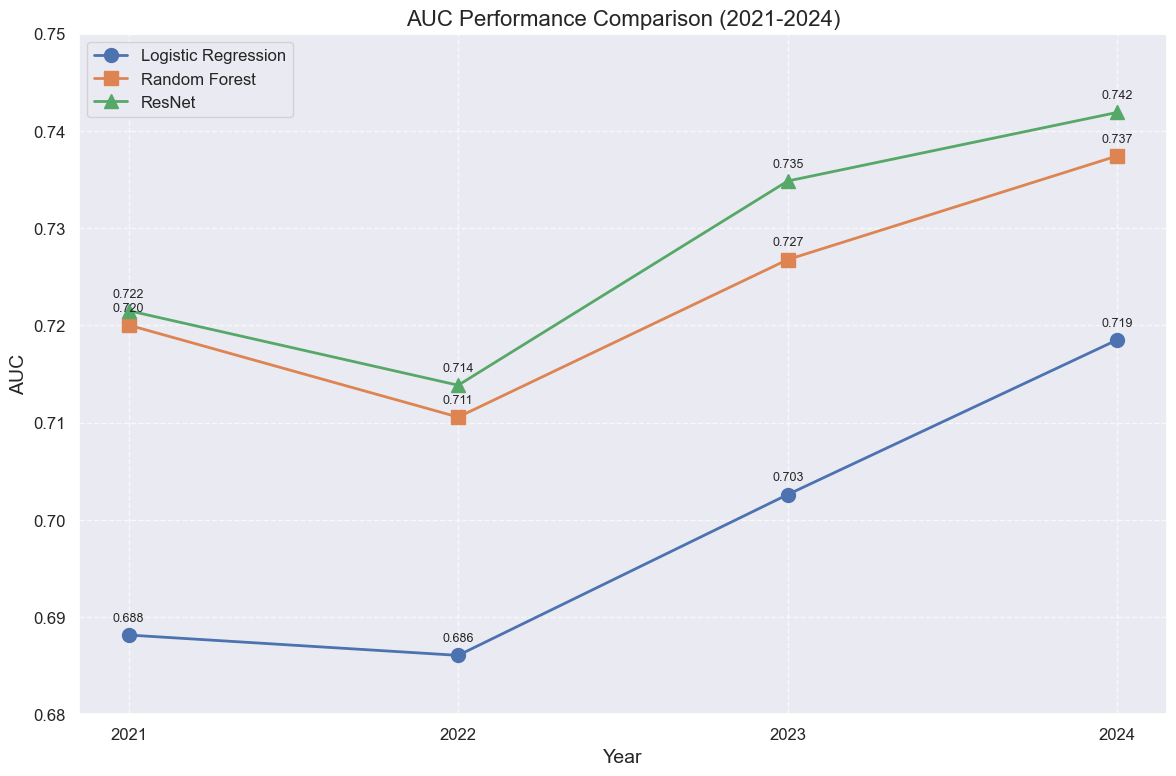

Model AUC Comparison 2021-2024
--------------------------------------------------
 Year  Logistic Regression  Random Forest   ResNet
 2021             0.688147       0.720022 0.721504
 2022             0.686055       0.710559 0.713834
 2023             0.702595       0.726755 0.734835
 2024             0.718505       0.737420 0.741892
--------------------------------------------------
Best performing model overall: ResNet 2024 (AUC: 0.741892)


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

years = [2021, 2022, 2023, 2024]
logistic_regression_auc = [0.688146822, 0.686055021, 0.702594585, 0.718505368]
random_forest_auc = [0.720022495, 0.710559261, 0.72675466, 0.73741971]
resnet_auc = [0.721504042, 0.713833888, 0.7348351, 0.741892129]

data = pd.DataFrame({
    'Year': years,
    'Logistic Regression': logistic_regression_auc,
    'Random Forest': random_forest_auc,
    'ResNet': resnet_auc
})

plt.figure(figsize=(12, 8))

plt.plot(data['Year'], data['Logistic Regression'], 'o-', linewidth=2, markersize=10, label='Logistic Regression')
plt.plot(data['Year'], data['Random Forest'], 's-', linewidth=2, markersize=10, label='Random Forest')
plt.plot(data['Year'], data['ResNet'], '^-', linewidth=2, markersize=10, label='ResNet')

plt.xlabel('Year', fontsize=14)
plt.ylabel('AUC', fontsize=14)
plt.title('AUC Performance Comparison (2021-2024)', fontsize=16)

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(years, fontsize=12)
plt.yticks(fontsize=12)

plt.ylim([0.68, 0.75])
plt.legend(fontsize=12)

for model in ['Logistic Regression', 'Random Forest', 'ResNet']:
    for i, auc in enumerate(data[model]):
        plt.annotate(f"{auc:.3f}",
                    (data['Year'][i], auc),
                    textcoords="offset points",
                    xytext=(0, 10),
                    ha='center',
                    fontsize=9)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

min_values = data.iloc[:, 1:].min()
max_values = data.iloc[:, 1:].max()
avg_values = data.iloc[:, 1:].mean()
improvement = data.iloc[-1, 1:] - data.iloc[0, 1:]

plt.savefig('model_auc_comparison_2021_2024.png', dpi=300, bbox_inches='tight')
plt.show()

print("Model AUC Comparison 2021-2024")
print("-" * 50)
print(data.to_string(index=False, float_format=lambda x: f"{x:.6f}"))
print("-" * 50)
print(f"Best performing model overall: ResNet 2024 (AUC: {max_values.max():.6f})")